In [1]:
import numpy as np 
from sklearn import datasets
from typing import List, Dict, Tuple, Union
from numpy.typing import ArrayLike
from nn import NeuralNetwork
import matplotlib.pyplot as plt 


In [2]:
## Generate an instance of your NeuralNetwork class for the 64x16x64 autoencoder
nn_arch_dictionary = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'}, {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]
nn_test = NeuralNetwork(nn_arch_dictionary, lr = 0.00001, seed = 10, batch_size = 2, epochs = 4, loss_function = 'mse')


In [3]:
## Read in toy dataset 'digits' from sklearn using digits = sklearn.datasets.load_digits()
digits = datasets.load_digits()


In [4]:
## Split the digits dataset into a train and a validation set
digits_data = digits['data']   # 1797 x 64
digits_target = np.expand_dims(digits.target, axis=1)  # 1797 x 1  # placing each value in it's own bracket to match data

# shuffling & randomizing data
data_shuffling = np.concatenate([digits_data, digits_target], axis=1)
np.random.shuffle(data_shuffling)
digits_data = data_shuffling[:,:-1]
digits_target = np.expand_dims(data_shuffling[:,-1], axis=1)

# setting up the training and validation data
digits_data_train = digits_data[:1350]  # training set will be 75% of whole dataset
digits_target_train = digits_target[:1350]

digits_data_val = digits_data[1350:1797] # validation set will be the remaining 25% of the dataset
digits_target_val = digits_target[1350:1797]


In [5]:
## Train your autoencoder on the train split of your digits dataset
per_epoch_loss_train, per_epoch_loss_val = nn_test.fit(digits_data_train, digits_target_train, digits_data_val, digits_target_val)


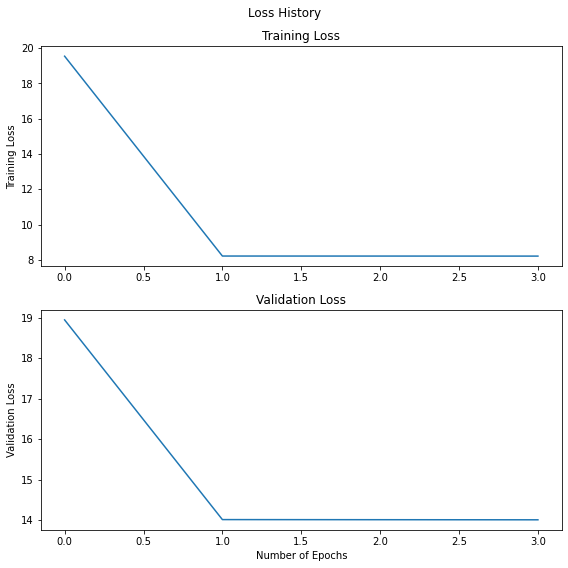

In [6]:
## Plot your training and validation loss per epoch
fig, axs = plt.subplots(2, figsize=(8,8))
fig.suptitle('Loss History')
axs[0].plot(np.arange(len(per_epoch_loss_train)), per_epoch_loss_train)
axs[0].set_title('Training Loss')
axs[1].plot(np.arange(len(per_epoch_loss_val)), per_epoch_loss_val)
axs[1].set_title('Validation Loss')
plt.xlabel('Number of Epochs')
axs[0].set_ylabel('Training Loss')
axs[1].set_ylabel('Validation Loss')
fig.tight_layout()
plt.show()

In [7]:
## Explain in your jupyter notebook why you chose the hyperparameter values that you did
"""
-- learning rate: I chose a lower learning rate so that my losses would not take a long time to get closer to 0
-- batch_size: I chose a smaller batch size to ensure that the losses at the end of the fit model would decrease at a reasonable rate (and there wouldn't be a RuntimeWarning)
-- epochs: I chose a lower number of epochs because the loss between training and validation sets reached negligible difference after a few runs.
-- loss function: I chose a mean-squared error loss function because I used the 'relu' activation function, and my values were not between 0 and 1.
"""


"\n-- learning rate: I chose a lower learning rate so that my losses would not take a long time to get closer to 0\n-- batch_size: I chose a smaller batch size to ensure that the losses at the end of the fit model would decrease at a reasonable rate (and there wouldn't be a RuntimeWarning)\n-- epochs: I chose a lower number of epochs because the loss between training and validation sets reached negligible difference after a few runs.\n-- loss function: I chose a mean-squared error loss function because I used the 'relu' activation function, and my values were not between 0 and 1.\n"

In [8]:
## Quantify your average reconstruction error over the dataset.

# we can use the predict function over the whole dataset and see how we did
data_predict = nn_test.predict(digits_data)

# average error?
aver_recon_error = np.mean(np.sum((data_predict - digits_data)**2))

print("The average reconstruction error over the dataset is:", aver_recon_error)

The average reconstruction error over the dataset is: 5045742.585245351
